# Q-Agent PlayGrounds
---
Use this Notebook to easily run different experiments using variable numbers of different classes of agents.

Start with importing necessary packages, modules:

In [1]:
import sys
sys.path.append('.')
import gym
from IPython.display import clear_output
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import warnings
import random
import os
import pickle
# pandas setting warnings can be ignored, as it is intendend often
warnings.simplefilter("ignore")

from QLearningAgents import QLearningBuyer, QLearningSeller
from RandOfferAgents import RandOfferBuyer, RandOfferSeller
from RandInterAgents import RandInterBuyer, RandInterSeller
from utils import update_q_tables, calculate_stats, calculate_steps, get_agents_equal, plot_stats, plot_q_tables, save_stats, learn

from environments import MarketEnvironment
from info_settings import BlackBoxSetting
from matchers import RandomMatcher

## Experiment Metrics
---
Define the experiment, Setup the market environment

In [2]:
#Number of Episodes
n_episodes = 100000
#Interval to print statistics
n_stats = 1000 # could also be n_episodes/100 or similar
#Negative reward for q-learning when agent is not yet done in Episode
negative_reward = -1

    
# Get Agents with defined:
# Reservation prices
# Starting/Default prices
# Number of different classes of sellers and buyers
buyers, sellers, inequality, q_learn_agents = get_agents_equal(sellr_reserve = 20, buyer_reserve = 100,
                                                           sellr_default = 100, buyer_default = 20,
                                                           n_rnd_off_buyers = 0, n_rnd_off_sellrs = 0,
                                                           n_rnd_int_buyers = 0, n_rnd_int_sellrs = 0,
                                                           n_q_learn_buyers = 5, n_q_learn_sellrs = 5)

dir_path = f'{n_episodes}_{n_stats}_B{len(buyers)}_S{len(sellers)}_Q{len(q_learn_agents)}'
if not os.path.exists(dir_path):
    os.mkdir(dir_path)
    
market_env = MarketEnvironment(sellers=sellers, buyers=buyers, max_steps=30,  
                               matcher=RandomMatcher(reward_on_reference=True), setting=BlackBoxSetting)

In [3]:
%%time
steps_list = learn(market_env, buyers, sellers, q_learn_agents, n_episodes, n_stats, negative_reward, inequality)

Episode 100000: Steps=1.387
B[q0]: Rewards=33.688
B[q1]: Rewards=32.392
B[q2]: Rewards=32.304
B[q3]: Rewards=32.36
B[q4]: Rewards=28.24
S[q0]: Rewards=33.456
S[q1]: Rewards=33.056
S[q2]: Rewards=35.704
S[q3]: Rewards=32.288
S[q4]: Rewards=34.088
CPU times: user 1h 30min 47s, sys: 4.75 s, total: 1h 30min 52s
Wall time: 1h 30min 43s


## Plot Averaged Results, Q Tables
---
* Buyer Rewards, Seller Rewards
* Steps per Episode
* Q Tables

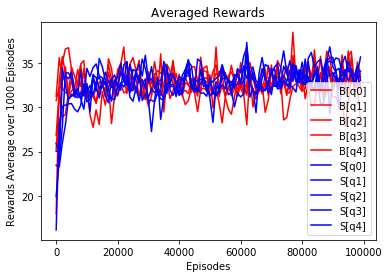

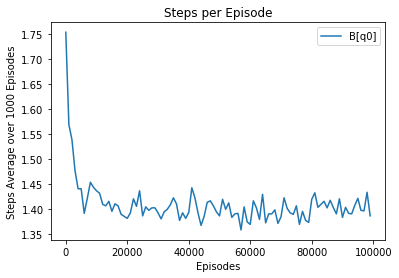

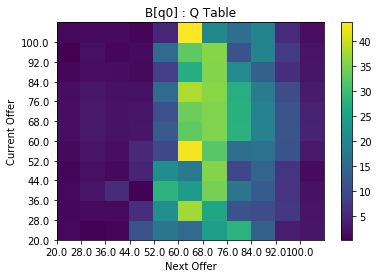

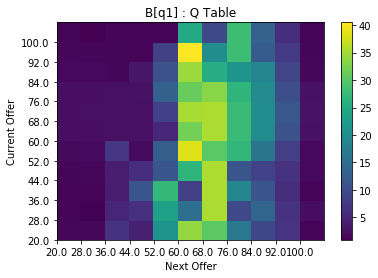

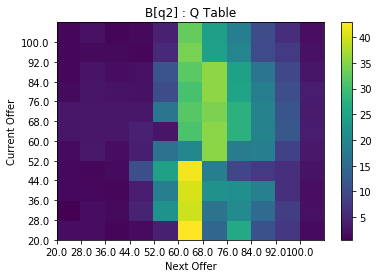

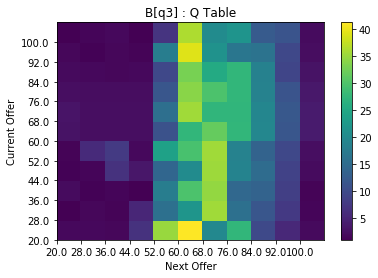

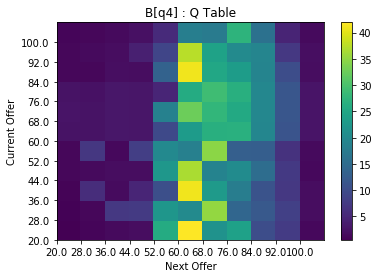

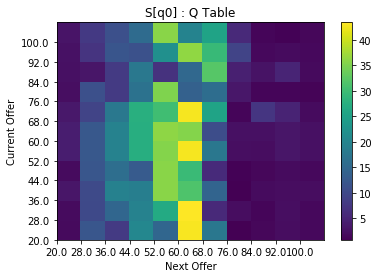

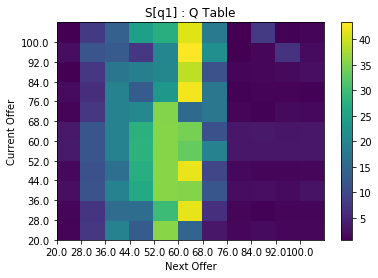

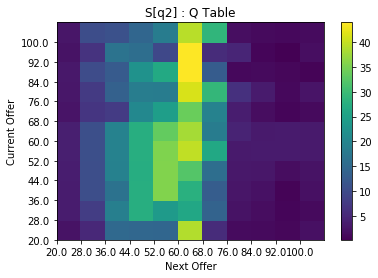

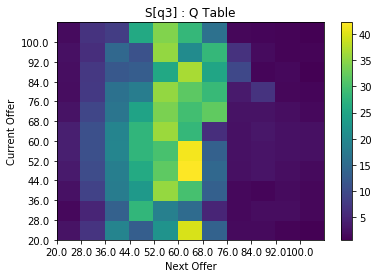

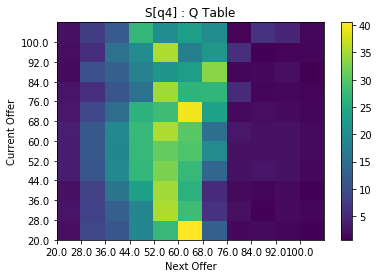

In [5]:
plot_stats(buyers+sellers, n_stats, dir_path, steps_list)
#plot_stats(buyers, n_stats)
#plot_stats(sellers, n_stats)
plot_q_tables(q_learn_agents, dir_path)

save_stats(buyers+sellers, n_stats, steps_list, dir_path)

with open(f'{dir_path}/agents.pkl', 'wb') as f:
    pickle.dump(buyers+sellers, f)
    
with open(f'{dir_path}/agents.pkl', 'rb') as f:
    loaded_agents = pickle.load(f)

In [5]:
pd.DataFrame(market_env.deal_history)

,Seller,Buyer,time,deal_price
0,S[q0],B[q1],0,55.337916
1,S[q4],B[q0],0,33.450666
2,S[q1],B[q3],0,38.800375
3,S[q3],B[q4],0,36.000000
4,S[q2],B[q2],1,56.085562


In [6]:
market_env.offers

,id,res_price,role,offer,time
0,S[q0],20,Seller,20.0,0
1,S[q1],20,Seller,36.0,0
2,S[q2],20,Seller,52.0,1
3,S[q3],20,Seller,36.0,0
4,S[q4],20,Seller,28.0,0
5,B[q0],100,Buyer,44.0,0
6,B[q1],100,Buyer,100.0,0
7,B[q2],100,Buyer,76.0,1
8,B[q3],100,Buyer,44.0,0
9,B[q4],100,Buyer,36.0,0
